C:\Users\Savitar\AppData\Local\Temp\ipykernel_2108\3883174296.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['Teacher Count'] = df1_cleaned.iloc[:, 1:].notna().sum(axis=1)
C:\Users\Savitar\AppData\Local\Temp\ipykernel_2108\3883174296.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Teacher Count'] = df2_cleaned.iloc[:, 1:].notna().sum(axis=1)
C:\Users\Savitar\AppData\Local\Temp\ipykernel_2108\3883174296.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Model Accuracy: 100.00%
Confusion Matrix:
[[6]]
Classification Report:
              precision    recall  f1-score   support

          12       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



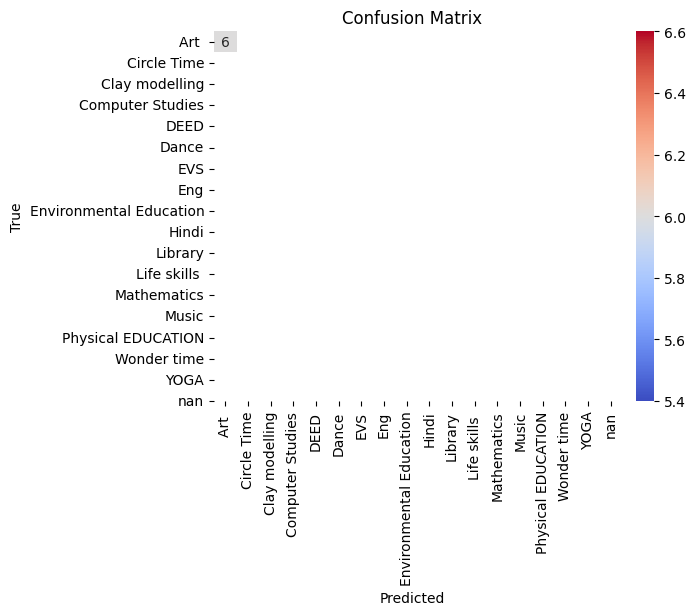

ValueError: y contains previously unseen labels: 'English'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load Data
df = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx")
df1 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=1)
df2 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=2)

# Step 2: Clean Data
# Cleaning and renaming columns if necessary
df1.columns = df1.columns.str.replace('\n', ' ', regex=True)
df2.columns = df2.columns.str.replace('\n', ' ', regex=True)

# Handle any missing values
df1_cleaned = df1.dropna(subset=['Jr. KG A'])  # Assuming 'Jr. KG A' contains teacher names, adjust as needed
df2_cleaned = df2.dropna(subset=['Unnamed: 1'])  # Remove rows with missing subjects/teachers

# Step 3: Extract Features and Labels for ML
# Example features could be: class, subject, teacher count, periods/week
df1_cleaned['Teacher Count'] = df1_cleaned.iloc[:, 1:].notna().sum(axis=1)
df2_cleaned['Teacher Count'] = df2_cleaned.iloc[:, 1:].notna().sum(axis=1)

# Feature engineering (Convert class and subject columns to categorical values)
encoder = LabelEncoder()
df1_cleaned['Class Encoded'] = encoder.fit_transform(df1_cleaned['Subject'])

# Step 4: Prepare Data for Model
# Assuming a basic prediction where 'Teacher Count' is our target variable (prediction goal)
X = df1_cleaned[['Class Encoded', 'Teacher Count']]  # Features
y = df1_cleaned['Teacher Count']  # Label

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Creation
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize Results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Make Predictions for Timetable Generation (Example)
# We can predict the teacher count and map it to subject teaching frequencies or class
new_data = pd.DataFrame({'Class Encoded': [encoder.transform(['English'])[0]], 'Teacher Count': [5]})
predictions = model.predict(new_data)
print(f"Predicted Teacher Count: {predictions}")


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
df = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx")
df1 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=1)
df2 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=2)

# Clean the data (remove extra spaces or newline characters in the headers)
df1.columns = df1.columns.str.replace('\n', ' ', regex=True).str.strip()
df2.columns = df2.columns.str.replace('\n', ' ', regex=True).str.strip()

# Clean subject names and drop rows with missing data
df1_cleaned = df1.dropna(how='any').copy()  # Drop rows with NaN values in df1
df2_cleaned = df2.dropna(how='any').copy()  # Similarly clean df2

# Standardize subject names in df2 for consistency
df2_cleaned['Subject'] = df2_cleaned['Subject'].str.strip().str.lower()

# Combine the cleaned dataframes for further analysis
combined_df = pd.concat([df1_cleaned, df2_cleaned], ignore_index=True)

# Check unique subjects
subjects = combined_df['Subject'].str.strip().str.lower().unique()  # Normalize subjects to lowercase

# Map teachers to subjects manually (ensure all subjects have an assigned teacher)
teacher_mapping = {
    'english': 'Mr. Johnson', 
    'hindi': 'Ms. Gupta', 
    'mathematics': 'Mr. Sharma', 
    'science': 'Ms. Lee',
    'art': 'Ms. Green', 
    'music': 'Mr. Taylor', 
    # Add more mappings as necessary
}
combined_df['Teacher'] = combined_df['Subject'].map(teacher_mapping).fillna('Unknown')

# Encode the target variable (teachers) and features (subjects)
combined_df['Subject'] = combined_df['Subject'].str.strip().str.lower()  # Normalize for consistency
subject_encoder, subject_labels = pd.factorize(combined_df['Subject'])
teacher_encoder, teacher_labels = pd.factorize(combined_df['Teacher'])

combined_df['Subject Encoded'] = subject_encoder
combined_df['Teacher Encoded'] = teacher_encoder

# Train a machine learning model to predict which teacher is assigned to a given subject
X = combined_df[['Subject Encoded']]  # Independent variable (feature)
y = combined_df['Teacher Encoded']    # Dependent variable (label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to predict teacher for a given subject
def predict_teacher_for_subject(subject):
    subject = subject.strip().lower()
    if subject not in subjects:
        print(f"Warning: Subject '{subject}' not found in training data. Returning 'Unknown'.")
        return 'Unknown'
    # Encode the subject
    subject_encoded = subject_encoder[np.where(subjects == subject)[0][0]]
    # Predict teacher
    predicted_teacher_encoded = model.predict([[subject_encoded]])[0]
    predicted_teacher = teacher_labels[predicted_teacher_encoded]
    return predicted_teacher

# Example usage
example_subjects = ['Mathematics', 'Science', 'Yoga']
for subj in example_subjects:
    print(f"Predicted teacher for {subj}: {predict_teacher_for_subject(subj)}")


KeyError: 'Subject'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
df = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx")
df1 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=1)
df2 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=2)

# Normalize column headers
df1.columns = df1.columns.str.replace('\n', ' ', regex=True).str.strip()
df2.columns = df2.columns.str.replace('\n', ' ', regex=True).str.strip()

# Standardize subject names and drop missing rows
df1_cleaned = df1.dropna().copy()
df2_cleaned = df2.dropna().copy()

df2_cleaned['Subject'] = df2_cleaned['Subject'].str.strip().str.lower()

# Combine the datasets
combined_df = pd.concat([df1_cleaned, df2_cleaned], ignore_index=True)

# Normalize subjects for consistent naming
combined_df['Subject'] = combined_df['Subject'].str.strip().str.lower()

# Teacher mapping
teacher_mapping = {
    'english': 'Mr. Johnson', 
    'math': 'Mr. Smith', 
    'science': 'Ms. Lee', 
    'art': 'Ms. Green',
    'music': 'Mr. Taylor',
    # Add more as necessary
}
combined_df['Teacher'] = combined_df['Subject'].map(teacher_mapping).fillna('Unknown')

# Factorize subject and teacher columns
subject_encoder, subject_labels = pd.factorize(combined_df['Subject'])
teacher_encoder, teacher_labels = pd.factorize(combined_df['Teacher'])

combined_df['Subject Encoded'] = subject_encoder
combined_df['Teacher Encoded'] = teacher_encoder

# Prepare data for training
X = combined_df[['Subject Encoded']]
y = combined_df['Teacher Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(
    "Classification Report:\n",
    classification_report(y_test, y_pred, zero_division=1)  # Handle undefined metrics
)

# Define prediction function
def predict_teacher_for_subject(subject):
    subject = subject.strip().lower()
    if subject not in subject_labels:
        print(f"Subject '{subject}' not found in training data. Returning 'Unknown'.")
        return 'Unknown'
    subject_encoded = subject_encoder[np.where(subject_labels == subject)[0][0]]
    predicted_teacher_encoded = model.predict([[subject_encoded]])[0]
    predicted_teacher = teacher_labels[predicted_teacher_encoded]
    return predicted_teacher

# Example usage
example_subjects = ['Mathematics', 'Science', 'Yoga']
for subj in example_subjects:
    print(f"Predicted teacher for {subj}: {predict_teacher_for_subject(subj)}")


KeyError: 'Subject'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
# Adjust the header to skip unnecessary rows and set correct headers
df1 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=1, header=1)
df2 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=2, header=1)

# Clean and normalize column names
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# Ensure the required columns exist in df1 and df2
if 'subject' not in df2.columns:
    raise KeyError("'subject' column not found in df2. Please verify your Excel sheet structure.")

# Clean the data: Remove rows with missing values and standardize text
df1_cleaned = df1.dropna().copy()
df2_cleaned = df2.dropna().copy()
df2_cleaned['subject'] = df2_cleaned['subject'].str.strip().str.lower()

# Combine the datasets
combined_df = pd.concat([df1_cleaned, df2_cleaned], ignore_index=True)

# Map teachers to subjects (example mappings)
teacher_mapping = {
    'math': 'Mr. Smith',
    'english': 'Ms. Johnson',
    'science': 'Dr. Lee',
    'history': 'Mr. Brown',
    'art': 'Ms. Green',
    'music': 'Mr. Taylor'
}

# Ensure the subjects in the combined data are properly normalized
combined_df['subject'] = combined_df['subject'].str.strip().str.lower()

# Add a 'teacher' column based on subject
combined_df['teacher'] = combined_df['subject'].map(teacher_mapping)

# Drop rows where teacher mapping is missing
combined_df = combined_df.dropna(subset=['teacher'])

# Encode the target variable and features
subject_encoder, subject_labels = pd.factorize(combined_df['subject'])
teacher_encoder, teacher_labels = pd.factorize(combined_df['teacher'])

combined_df['subject_encoded'] = subject_encoder
combined_df['teacher_encoded'] = teacher_encoder

# Prepare data for ML
X = combined_df[['subject_encoded']]  # Features
y = combined_df['teacher_encoded']   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Define a function to predict teacher based on subject
def predict_teacher_for_subject(subject):
    subject = subject.strip().lower()
    if subject not in teacher_mapping:
        raise ValueError(f"Subject '{subject}' not found in teacher mappings.")
    
    encoded_subject = subject_encoder[subject_labels.tolist().index(subject)]
    predicted_teacher_encoded = model.predict([[encoded_subject]])[0]
    predicted_teacher = teacher_labels[predicted_teacher_encoded]
    return predicted_teacher

# Example usage
try:
    subject_to_predict = 'Math'
    predicted_teacher = predict_teacher_for_subject(subject_to_predict)
    print(f"The predicted teacher for subject '{subject_to_predict}' is: {predicted_teacher}")
except ValueError as e:
    print(e)


KeyError: "'subject' column not found in df2. Please verify your Excel sheet structure."

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data (adjust header to skip unnecessary rows)
df1 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=1, header=1)
df2 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name=2, header=1)

# Inspect columns in df2
print("df2 Columns: ", df2.columns)  # Debugging step
subject_col = next((col for col in df2.columns if "subject" in col.lower()), None)

if not subject_col:
    raise KeyError("No 'subject' column found in df2. Verify the sheet structure.")

# Rename the subject column for consistency
df2.rename(columns={subject_col: 'subject'}, inplace=True)

# Clean data: Normalize column names
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# Remove rows with missing data
df1_cleaned = df1.dropna().copy()
df2_cleaned = df2.dropna().copy()
df2_cleaned['subject'] = df2_cleaned['subject'].str.strip().str.lower()

# Combine data
combined_df = pd.concat([df1_cleaned, df2_cleaned], ignore_index=True)

# Map teachers to subjects (example mappings)
teacher_mapping = {
    'math': 'Mr. Smith',
    'english': 'Ms. Johnson',
    'science': 'Dr. Lee',
    'history': 'Mr. Brown',
    'art': 'Ms. Green',
    'music': 'Mr. Taylor'
}

# Map teacher names and drop missing mappings
combined_df['teacher'] = combined_df['subject'].map(teacher_mapping)
combined_df = combined_df.dropna(subset=['teacher'])

# Encode features and target variable
subject_encoder, subject_labels = pd.factorize(combined_df['subject'])
teacher_encoder, teacher_labels = pd.factorize(combined_df['teacher'])

combined_df['subject_encoded'] = subject_encoder
combined_df['teacher_encoded'] = teacher_encoder

# Prepare data for ML
X = combined_df[['subject_encoded']]
y = combined_df['teacher_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Prediction function
def predict_teacher_for_subject(subject):
    subject = subject.strip().lower()
    if subject not in teacher_mapping:
        raise ValueError(f"Subject '{subject}' not found in teacher mappings.")
    encoded_subject = subject_encoder[subject_labels.tolist().index(subject)]
    predicted_teacher_encoded = model.predict([[encoded_subject]])[0]
    return teacher_labels[predicted_teacher_encoded]

# Example Usage
try:
    subject_to_predict = 'Math'
    predicted_teacher = predict_teacher_for_subject(subject_to_predict)
    print(f"The predicted teacher for subject '{subject_to_predict}' is: {predicted_teacher}")
except ValueError as e:
    print(e)



df2 Columns:  Index(['Unnamed: 0', 'Home room Teachers ', 'Home room \nTeachers ',
       'Subjects', 'Class alloted'],
      dtype='object')


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [11]:
print(df1.columns)
print(df2.coloums)



Index(['eng', 'nupur ft , pooja  r', 'maria , banu', 'shireen , riya j',
       'sheetal anjum', 'ruksaar darshana', 'bhakti laxmipriya',
       'shubha ft , priyanka', 'ankita\n jyoti v', 'remya,saraswati -ft',
       'kanak,matilda', 'rishita,shashwati,', 'charu ,maariyah,'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'coloums'

In [ ]:
df = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx")
df1 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name = 1)
df2 = pd.read_excel(r"C:\Users\Savitar\Downloads\TimeTable Project.xlsx", sheet_name = 2)